<a href="https://colab.research.google.com/github/larialbu/curso_machine_learning_senac/blob/main/aula_13.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Como construir rede neural em keras

In [1]:
import tensorflow as tf
import tensorflow.keras as keras

In [13]:
import seaborn as sns
import pandas as pd
from sklearn.model_selection import train_test_split
titanic = sns.load_dataset('titanic')

feature_names = ['pclass','female','age','fare']
titanic['female'] = titanic['sex'].map({'male':0,'female':1})
titanic.dropna(subset=feature_names, inplace=True) #891 para  714

X = titanic[feature_names].to_numpy()
y = titanic['survived'].to_numpy()

X_train,X_test,y_train,y_test = train_test_split(X, y,test_size=0.25,random_state=123)

In [14]:
print('tamanho do x train:', X_train.shape)
print('tamanho do x test:', X_test.shape)
print('tamanho do y train:', y_train.shape)
print('tamanho do y test:', y_test.shape)

tamanho do x train: (535, 4)
tamanho do x test: (179, 4)
tamanho do y train: (535,)
tamanho do y test: (179,)


In [15]:
model = keras.models.Sequential() #cria uma rede neural sequencial
model.add(keras.layers.Dense(4,\
                             activation='relu', input_shape=X_train[0].shape))
model.add(keras.layers.Dropout(0.2))
model.add(keras.layers.Dense(1, activation='sigmoid'))

model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 4)                 20        
                                                                 
 dropout (Dropout)           (None, 4)                 0         
                                                                 
 dense_1 (Dense)             (None, 1)                 5         
                                                                 
Total params: 25
Trainable params: 25
Non-trainable params: 0
_________________________________________________________________


In [18]:
model.compile(loss=keras.losses.binary_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [21]:
from IPython.core import history
batch_size =32
epochs=100

history = model.fit(X_train, y_train,
                    batch_size=batch_size,
                    epochs=epochs, verbose=1,
                    validation_data=(X_test, y_test))

Epoch 1/100
17/17 [==============================] - 1s 17ms/step - loss: 7.9256 - accuracy: 0.4636 - val_loss: 4.4335 - val_accuracy: 0.4022
Epoch 2/100
17/17 [==============================] - 0s 4ms/step - loss: 7.5163 - accuracy: 0.4430 - val_loss: 3.2270 - val_accuracy: 0.4022
Epoch 3/100
17/17 [==============================] - 0s 5ms/step - loss: 5.8560 - accuracy: 0.5009 - val_loss: 2.1758 - val_accuracy: 0.4469
Epoch 4/100
17/17 [==============================] - 0s 5ms/step - loss: 5.2380 - accuracy: 0.5103 - val_loss: 1.3676 - val_accuracy: 0.4972
Epoch 5/100
17/17 [==============================] - 0s 5ms/step - loss: 6.9956 - accuracy: 0.5271 - val_loss: 0.9834 - val_accuracy: 0.5922
Epoch 6/100
17/17 [==============================] - 0s 4ms/step - loss: 4.8020 - accuracy: 0.5757 - val_loss: 0.8544 - val_accuracy: 0.6145
Epoch 7/100
17/17 [==============================] - 0s 6ms/step - loss: 5.4770 - accuracy: 0.5850 - val_loss: 0.7748 - val_accuracy: 0.6201
Epoch 8/100


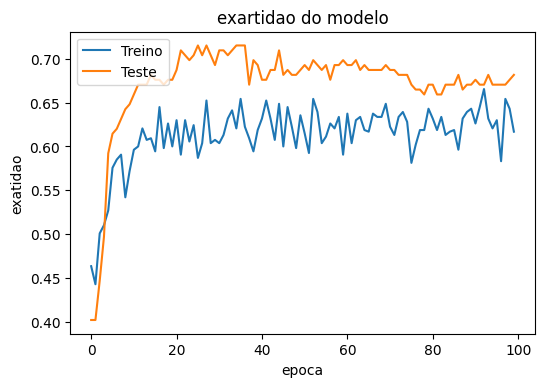

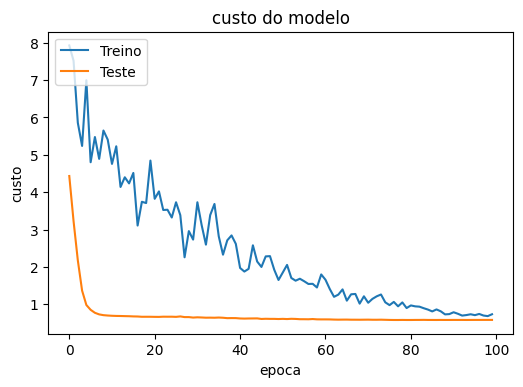

In [25]:
import matplotlib
import matplotlib.pyplot as plt

matplotlib.rcParams['figure.dpi'] = 100

#plot acuracia de treino evalidacao
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('exartidao do modelo')
plt.ylabel('exatidao')
plt.xlabel('epoca')
plt.legend(['Treino','Teste'], loc='upper left')
plt.show()

#plot custo de treino e validacao
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('custo do modelo')
plt.ylabel('custo')
plt.xlabel('epoca')
plt.legend(['Treino','Teste'], loc='upper left')
plt.show()

#previsoes do modelo

In [27]:
model.evaluate(X_test,y_test)

6/6 [==============================] - 0s 3ms/step - loss: 0.5846 - accuracy: 0.6816


[0.5845704078674316, 0.6815642714500427]

In [26]:
(model.predict(X_test>0.5).astype('int32'))

6/6 [==============================] - 0s 3ms/step


array([[0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    